<a href="https://colab.research.google.com/github/delafte/CC3001-Algoritmos_y_Estructuras_de_Datos/blob/main/Tarea1/Copy_of_CC3001_Oto%C3%B1o_2023_Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CC3001 Otoño 2023 Tarea 1 [Delaney Tello]

# Pilas de arena abelianas

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Patricio Poblete •
Sección 3 Nelson Baloian




# Introducción
El objetivo de esta tarea es estudiar un problema inspirado en un fenómeno físico, a través de un modelo matemático, el cual si bien es sencillo, produce resultados que presentan una estructura muy interesante.

<img src="https://ivan-sipiran.com/downloads/arena.png" alt= “” width="200">

La idea es que si uno va formando una pila de arena, llega un momento en que se produce un derrumbe, y la arena de esa pila se derrama hacia los lugares vecinos, estos a su vez se pueden derrumbar, y el proceso continúa hasta que finalmente se estabiliza.

Para estudiar este proceso, usaremos un modelo ultra simplificado. Supondremos que la arena se deposita sobre una superficie plana, la cual está dividida en pequeñas celdas cuadradas, las cuales forman un tablero como se muestra en la siguiente figura:

<img src="https://ivan-sipiran.com/downloads/tablero.png" alt= “” width="100">

El modelo supone que si se apilan demasiados granos de arena en una celda, se produce un derrumbe. En particular, la regla es que si en una celda hay 4 o más granos, se le quitan 4 granos, que se reparten equitativamente hacia las celdas vecinas en los cuatro puntos cardinales.

Para simular este proceso, supondremos que cada celda almacena un número entero, que es la cantidad de granos almacenados en su interior. Aplicando la regla antes descrita (y suponiendo que las celdas que aparecen vacías tienen cero granos), desde la configuración

<img src="https://ivan-sipiran.com/downloads/tablero1.png" alt= “” width="100">

se pasaría a

<img src="https://ivan-sipiran.com/downloads/tablero2.png" alt= “” width="100">

Cuando hay más de una casilla con exceso de granos de arena, la regla se puede aplicar a ellas en cualquier orden y el resultado final es el mismo. Esta propiedad es la que hace que estas pilas de arena se llamen abelianas.

La idea es partir desde una configuración inicial, y luego aplicar esta regla en todos los casilleros que se pueda, hasta que no quede ninguno que tenga 4 o más granos de arena. Esa configuración final la vamos a visualizar asignando un color distinto a cada número de granos.

En particular, nos va a interesar estudiar lo que ocurre cuando la configuración inicial tiene todas las celdas vacías, excepto la del centro, en la cual hay $N$ granos de arena (donde $N$ es un parámetro del problema).

Note que en teoría el tablero es infinito en el sentido que siempre hay espacio para colocar los granos de arena que se van distribuyendo. Para su simulación, usted debe calcular un tamaño del tablero lo suficientemente grande como para estar seguro que ningún grano de arena se salga hacia afuera de los bordes (calcule la máxima área que se puede cubrir con $N$ granos de arena, y después calcule cuan grande debe ser el tablero  para poder contener esa área).

# Tarea

## Parte 1
Usted debe escribir una función en Python llamada ``arena``, tal que dado un valor de $N$, simule el proceso anteriormente descrito hasta que se estabilice. El programa debe contar e imprimir el número total de veces que se aplicó la regla que distribuye granos de arena hacia los vecinos. Además, debe visualizar en la pantalla el tablero resultante, usando los métodos que se describen más adelante.

Por ejemplo, al simular con $N=10000$, la figura que resulta es

<img src="https://ivan-sipiran.com/downloads/tablero3.png" alt= “” width="250">

La idea va a ser ejecutar la función con un valor de $N$ dado por el profesor ($N=128$) y luego con valores crecientes de $N$, hasta el mayor número que pueda alcanzar dentro de un tiempo de ejecución razonable.



Escriba a continuación la definición de su función:

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

def arena(N):
  #definimos el tamaño de la matriz a partir de N
  if N <=16:
    radio = math.trunc(math.sqrt(N/math.pi)*1.3)
  else:
    radio = math.trunc(math.sqrt(N/math.pi)*0.9)
  diametro = (radio*2)
  matriz = np.zeros((diametro+1,diametro+1),int)
  matriz[radio][radio] = N
  #variables que nos servirán en el ciclo:
  sihay = True
  veces = 0

  while(sihay):
    #condición que nos servirá para controlar en ciclo while
    contador = 0

    for i in range(diametro):
      for j in range(diametro):
        if matriz[i][j] >= 4:
          #contador de aplicación de la regla:
          veces +=1
          matriz[i][j] -= 4
          matriz[i+1][j]+=1
          matriz[i-1][j]+=1
          matriz[i][j+1] +=1
          matriz[i][j-1] +=1

          if matriz[i][j] >= 4 or matriz[i+1][j] >= 4 or matriz[i-1][j] >= 4 or matriz[i][j+1] >= 4 or matriz[i][j-1] >= 4:
            contador +=1
    #si es que hay algún número mayor o igual a 4 aún, el contador será mayor o igual a uno y el ciclo se repitirá
    if contador < 1:
      sihay = False


  print("Numero total de veces que se aplico la regla de distribucion: "+ str(veces))
  plt.matshow(matriz)
  plt.show()

Explique aquí cómo calculó el tamaño que necesita tener el tablero.

Al simular el comportamiento de la distribución con distintos números de manera manual y ver el ejemplo dado en el enunciado de esta tarea, se puede concluir que este método tiende a distribuir los números más o menos de manera circular (en caso extremo quedando con puros unos en las casillas más lejanas).
Por aquello, se podría establecer que la cantidad de casilleros en un círculo viene dado por la fórmula que se programó en la línea 7 (pi*r*r = n), en donde se despejó el radio. Con ello, la matriz quedará en función del diámetro que está en función de N (al diámetro se le sumó el 1 para que el número de casillas fuera impar y así la figura quedara bien centrada).

En el caso de números menores a 16, sumamos un 30 porciento, y en adelante le quitamos un 10 porciento. Con aquello la matriz queda en un tamaño acorde a los casos.

Ahora ejecute la función para $N=128$:

Numero total de veces que se aplico la regla de distribucion: 342


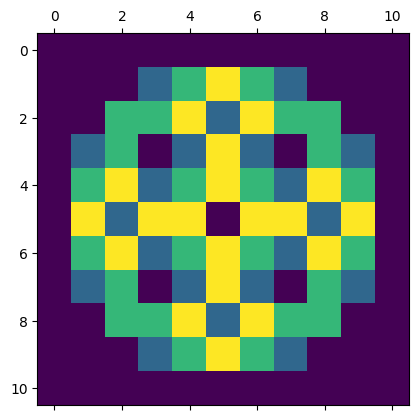

In [2]:
arena(128)

A continuación ejecute la función para el valor más grande de $N$ que consiga alcanzar en un tiempo razonable:

Numero total de veces que se aplico la regla de distribucion: 1830917


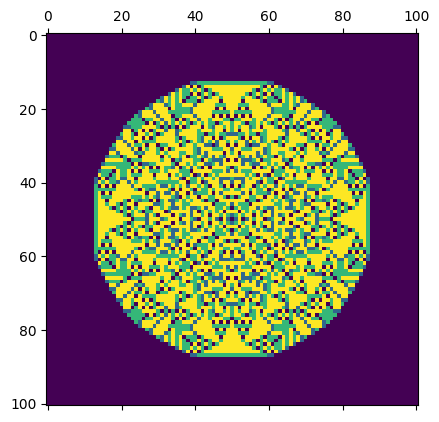

In [3]:
arena(10000) # reemplace N por el valor máximo que alcanzó a procesar (45s)

## Parte 2
Observe que cuando en una celda hay un número grande de granos de arena, es muy ineficiente ir quitándole de 4 en 4, y sería mejor quitar de una sola vez lo más que se pueda. Podemos mejorar nuestro programa si cambiamos la regla de distribución, y decimos que si en una celda hay un número de granos de arena mayor o igual a 4, le quitamos de una sola vez el mayor múltiplo de 4 posible, y todos esos granos lo repartimos equitativamente entre los vecinos de los cuatro puntos cardinales. Escriba una versión modificada de su función de acuerdo a esta nueva regla.



In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

def arena2(N):
  if N <=16:
    radio = math.trunc(math.sqrt(N/math.pi)*1.3)
  else:
    radio = math.trunc(math.sqrt(N/math.pi)*0.9)
  diametro = (radio*2)
  matriz = np.zeros((diametro+1,diametro+1),int)
  matriz[radio][radio] = N
  sihay = True
  veces = 0

  while(sihay):
    contador = 0

    for i in range(diametro+1):
      for j in range(diametro+1):
        if matriz[i][j] >= 4:
         veces += 1
         restar = (matriz[i][j]-(matriz[i][j]%4))
         #aca esta la diferencia con la funcion anterior, definimos restar y sumar como el mayor múltiplo de 4 posible, sumar se divide en 4 para repartir a casillas
         sumar = restar/4
         matriz[i][j] -= restar
         matriz[i+1][j]+= sumar
         matriz[i-1][j]+= sumar
         matriz[i][j+1] += sumar
         matriz[i][j-1] += sumar
         if matriz[i+1][j] >= 4 or matriz[i-1][j] >= 4 or matriz[i][j+1] >= 4 or matriz[i][j-1] >= 4:
            contador +=1

    if contador < 1:
      sihay = False

  print("Numero total de veces que se aplico la regla de distribucion: "+ str(veces))
  plt.matshow(matriz)
  plt.show()

Ahora ejecute la función para $N=128$:

Numero total de veces que se aplico la regla de distribucion: 227


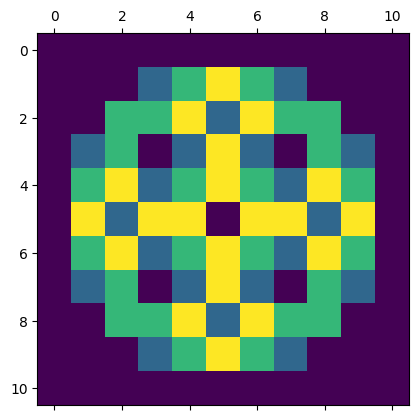

In [5]:
arena2(128)

A continuación ejecute la función para el valor más grande de  𝑁  que consiga alcanzar en un tiempo razonable. Note que éste número no necesariamente es el mismo que para la función anterior:

Numero total de veces que se aplico la regla de distribucion: 2714493


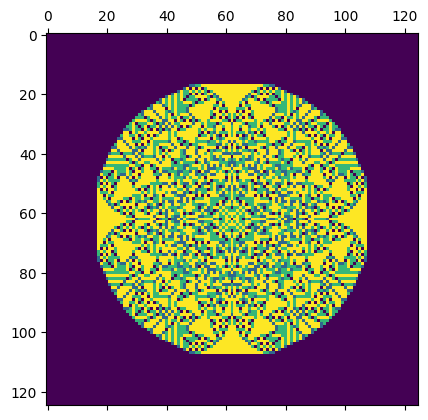

In [6]:
arena2(15000) # reemplace N por el valor máximo que alcanzó a procesar (57s)

## Parte 3
Compare a través de una tabla y un gráfico el número de aplicaciones de la regla que hace el programa en la Parte 1 y el de la Parte 2, para los distintos valores de $N$ que usted haya calculado.

Discuta si valió la pena la optimización y discuta también (pero no implemente) otras posibles optimizaciones que se le ocurran.

Numero total de veces que se aplico la regla de distribucion: 225


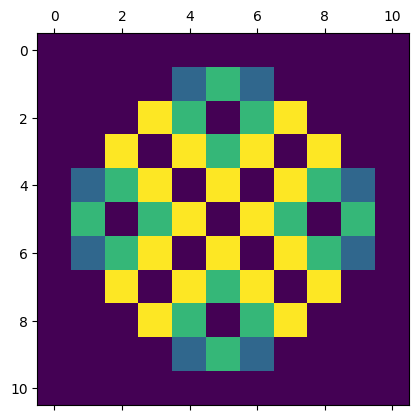

Numero total de veces que se aplico la regla de distribucion: 149


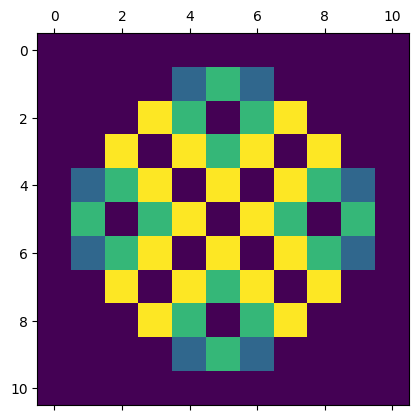

Numero total de veces que se aplico la regla de distribucion: 4702


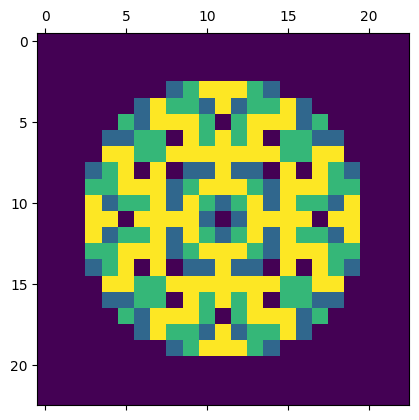

Numero total de veces que se aplico la regla de distribucion: 3031


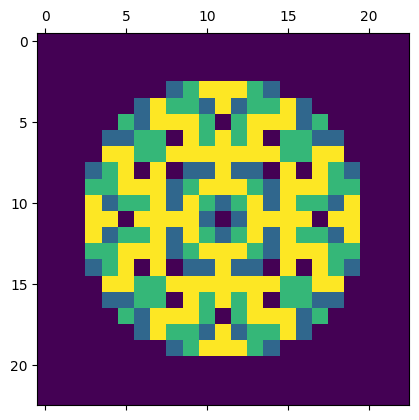

Numero total de veces que se aplico la regla de distribucion: 18226


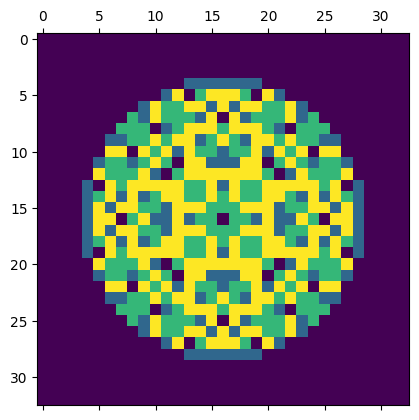

Numero total de veces que se aplico la regla de distribucion: 11724


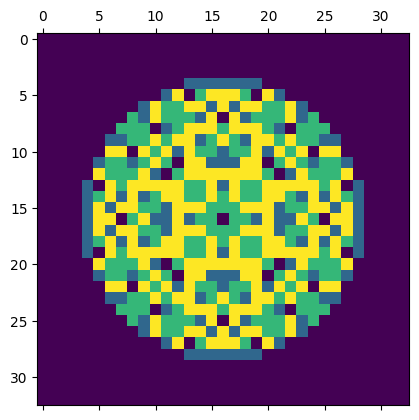

Numero total de veces que se aplico la regla de distribucion: 466188


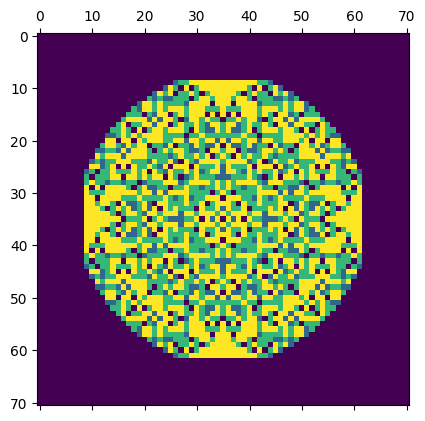

Numero total de veces que se aplico la regla de distribucion: 307656


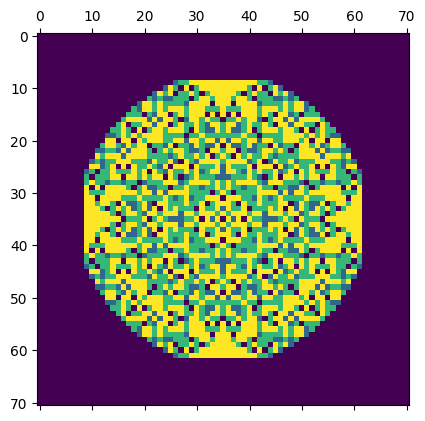

Numero total de veces que se aplico la regla de distribucion: 1830917


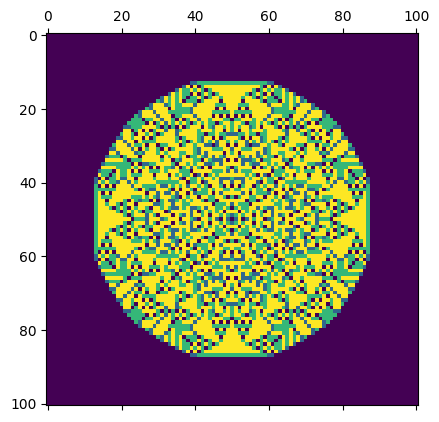

Numero total de veces que se aplico la regla de distribucion: 1196817


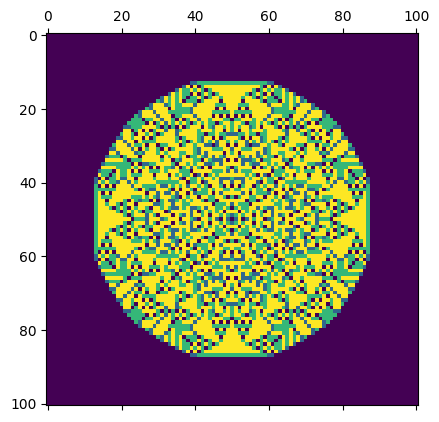

Numero total de veces que se aplico la regla de distribucion: 4140613


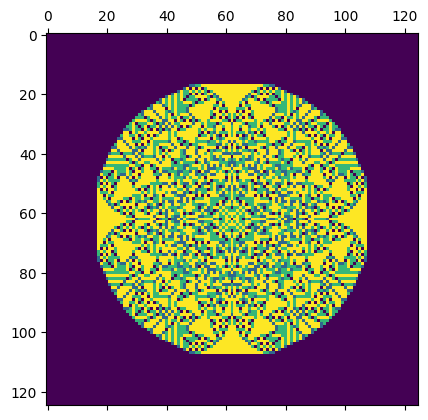

Numero total de veces que se aplico la regla de distribucion: 2714493


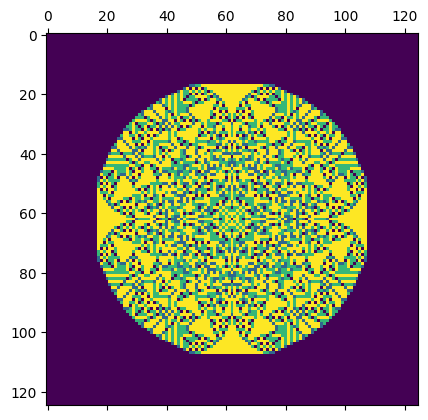

In [7]:
#pruebas para datos de tabla
arena(100)
arena2(100)

arena(500)
arena2(500)

arena(1000)
arena2(1000)

arena(5000)
arena2(5000)

arena(10000)
arena2(10000)

arena(15000)
arena2(15000)


   valor de N  aplicaciones regla: arena  aplicaciones regla: arena2
0         100                        225                         149
1         500                       4702                        3031
2        1000                      18226                       11724
3        5000                     466188                      307656
4       10000                    1830917                     1196817
5       15000                    4140613                     2714493


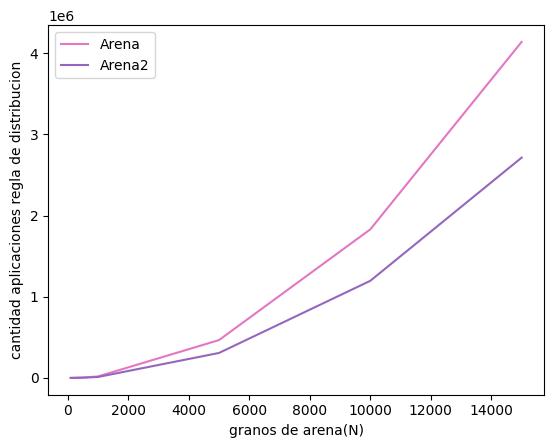

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame([[100, 225, 149], [500, 4702, 3031], [1000, 18226, 11724],[5000, 466188, 307656],[10000, 1830917, 1196817],[15000, 4140613, 2714493]], columns = ["valor de N","aplicaciones regla: arena", "aplicaciones regla: arena2"])
print(df)
fig, ax = plt.subplots()
cantidades = [100, 500, 1000, 5000, 10000, 15000]
arena1 = [225, 4702, 18226, 466188, 1830917, 4140613]
Arena2 = [149, 3031, 11724, 307656, 1196817, 2714493]
ax.plot(cantidades, arena1, label = "Arena", color = 'tab:pink')
ax.plot(cantidades, Arena2, label = "Arena2", color = 'tab:purple')
ax.legend(loc = 'upper left')
ax.set_ylabel("cantidad aplicaciones regla de distribucion")
ax.set_xlabel("granos de arena(N)")
plt.show()

Con los resultados obtenidos, es evidente que la optimización realizada valió la pena. En un principio, con números menores, no se observa una gran diferencia entre las cantidades de aplicación de la regla, pero al ir aumentando N, la divergecia comienza a aumentar. Así se logra en N = 15000 un diferencia de 1426120, concluyendo con aquello que arena2 es mucho más eficiente.

Otra optimización que se podría implementar sería que al restarle a N el mayor múltiplo de 4, se evalúe si es mayor o igual a 16, ya que en el caso de ser afirmativo, habría que volver a aplicar la regla desde el principio(repetir el ciclo). Así, en el caso de que la desigualdad sea verdadera, se distribuyan nuevamente a las casillas vecinas inmediatamente. Con ello, se podrían reducir las cantidades de aplicaciones de la regla establecida.

Cabe destacar que aquello se puede extender a mayores casos (por ejemplo, en el caso de 64 al expandirlo a los vecinos hay que volver a distribuir dos veces más), es decir, que se evalúe el múltiplo de 4 que se resta y expandir los granos de arena inmediatamente a todas las casillas necesarias.



# Visualización

Para la visualización se recomienda usar arreglos de Numpy y la librería Matplotlib. A continuación un código de ejemplo:

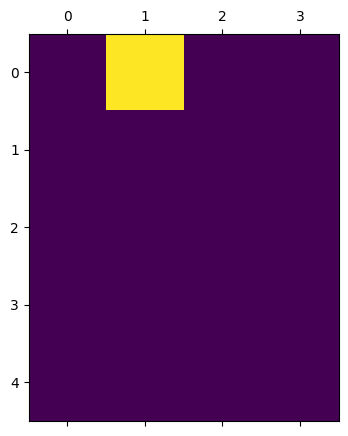

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Crea una matriz de numpy llena de ceros de dimensión 5x4
mat = np.zeros((5,4))

#Asigna un uno en la posición (0,1)
mat[0][1] = 1

#Dibuja
plt.matshow(mat)
plt.show()

## ¿Qué hay que entregar?

Usted debe crear una copia de este documento (del menú seleccionar "Archivo" o "File" y de ahi la opción "guardar copia en Drive" o "save a copy in Drive"). Este nuevo documento (notebook de Colab) es el que debe modificar para luego compartirlo con la opción "Cualquier usuario de internet con este enlace puede ver esto" (o “Anyone on the internet with this link can view”). Esta opción se encuentra disponible en la parte superior derecha de su notebook, en el botón "Compartir" (o "Share"). Una vez que tenga disponible el enlace, colocarlo en la descripción de la entrega de su tarea. No olvide colocar su nombre dentro del notebook.